In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r"/Users/sammyeyong/Documents/Data Analysis Projects/superstore project/train.csv")

In [4]:
if df.duplicated().sum() > 0: 
    print("il y a des doublons") 
else: 
    print("il n'y a pas de doublon")

il n'y a pas de doublon


In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
''' Big businesses often don't know which customers matter most 
because they lack the right data and end up guessing. 
This means they waste time and money in the wrong areas, 
losing sales and leaving customers dissatisfied.''' 

" Big businesses often don't know which customers matter most \nbecause they lack the right data and end up guessing. \nThis means they waste time and money in the wrong areas, \nlosing sales and leaving customers dissatisfied."

In [7]:
types_of_customers = df['Segment'].unique() 
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [8]:
# find out number of customers for each type of customer
number_of_customers = df['Segment'].value_counts().reset_index() 
number_of_customers = number_of_customers.rename(columns={'Segment' : 'Type of Customer'}) 
print(number_of_customers)

  Type of Customer  count
0         Consumer   5101
1        Corporate   2953
2      Home Office   1746


([<matplotlib.patches.Wedge at 0x1363ef110>,
 [Text(-0.07082911608159115, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.038634063317231536, 0.5987548823613884, '52.05%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.13%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.82%')])

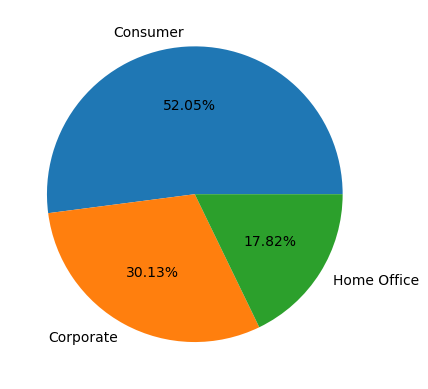

In [9]:
# put it in a pie chart 
# we know the percentages of each type of customer.
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customer'], autopct='%1.2f%%')

In [10]:
# how do we figure out which segments generate the most value CLT ?
# How much does it cost to acquire a customer in each segment customer acquisition cost CAC ? 
# how satisfied are customers in each segment? 
# what is the churn rate in each segment.

  Type Of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

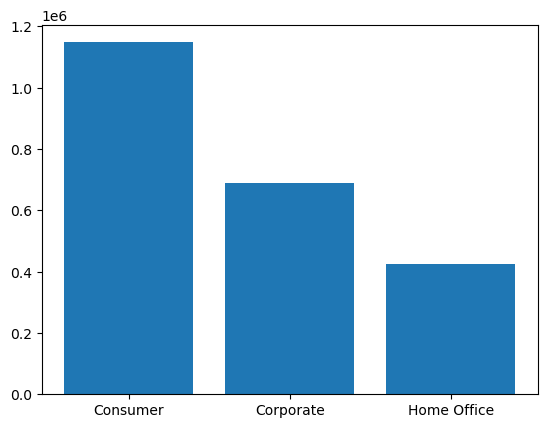

In [11]:
# How much did each segment make in sales displayed in bar chart
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index() 
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type Of Customer', 'Sales' : 'Total Sales'}) 
print(sales_per_segment) 
plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

In [12]:
'''as a business we want to make sure our most loyal customers stay happy. 
We can find out who is loyal by number of purchases or amount spent. 
Then we can take this and send them things like marketing emails.'''

customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID' : 'Total Orders'}, inplace=True) 

In [13]:
# let us identify our repeat customers from most to least. 
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >= 1] 
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

In [14]:
''' we see that Consumers are priority for our marketing efforts. 
We also have the other segments and must cater to them.'''
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29


In [14]:
''' We can also identify our loyal customers by sales amount. 
If someone places 35 orders for 1 euro, they are not worth it.''' 
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index() 
top_spenders = customer_sales.sort_values(by='Sales', ascending=False) 
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [15]:
# top customers doesn't reflect spending habits.
#  We will dedicate to the ones who spend the most money. 

In [16]:
''' We want to know which shipping methods customers prefer, 
and which are most cost effective and reliable. ''' 
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index': 'Use Frequency', 'Ship Mode': 'Mode Of Shipment'}) 
print(shipping_model) 

  Mode Of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


([<matplotlib.patches.Wedge at 0x1280a5e10>,
 [Text(-0.3328682142840549, 1.0484267985507356, 'Standard Class'),
  Text(-0.3732753555364641, -1.0347296791670404, 'Second Class'),
  Text(0.7455146923475287, -0.8088311588298078, 'First Class'),
  Text(1.083680807320627, -0.18877475425732734, 'Same Day')],
 [Text(-0.18156448051857538, 0.5718691628458558, '59.79%'),
  Text(-0.20360473938352586, -0.5643980068183856, '19.41%'),
  Text(0.4066443776441065, -0.44118063208898606, '15.32%'),
  Text(0.5910986221748874, -0.102968047776724, '5.49%')])

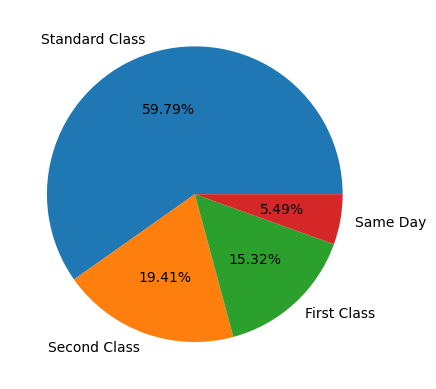

In [17]:
plt.pie(shipping_model['count'], labels=shipping_model['Mode Of Shipment'], autopct='%1.2f%%')

In [18]:
'''Often companies don't know how their plants in each region are doing. 
For example, under performance or high potential areas. 
It is best to find out sales for each city or region''' 
state = df['State'].value_counts().reset_index() 
state = state.rename(columns={'index':'State', 'State':'Number Of Customers'})
print(state.head(20)) 

   Number Of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


In [15]:
city = df['City'].value_counts().reset_index() 
print(city.head(15))

             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82


In [16]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index() 
top_sales = state_sales.sort_values(by='Sales', ascending=False) 
print(top_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [17]:
#NY and LA are our biggest markets
city_sales = df.groupby(['City'])['Sales'].sum().reset_index() 
top_city_sales = city_sales.sort_values(by='Sales', ascending=False) 
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [18]:
# We want to track down our most popular category of products. Even popular category per region. 
products = df['Category'].unique() 
print(products) 
#subcategories too 
product_subcategory = df['Sub-Category'].unique() 
print(product_subcategory) 
# see how many subcategories each category has. 
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index() 
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False) 
print(subcategory_count)


['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [19]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index() 
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False) 
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


In [20]:
#Which category has the most amount of sales. 
product_category = df.groupby(['Category'])['Sales'].sum().reset_index() 
top_product_category = product_category.sort_values(by='Sales', ascending=False) 
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x1364cd110>,
 [Text(0.4498857223734124, 1.003794220348251, 'Technology'),
  Text(-1.0842321085760298, -0.18558215090028554, 'Furniture'),
  Text(0.6127880326006168, -0.9135046946247543, 'Office Supplies')],
 [Text(0.24539221220367946, 0.547524120189955, '36.59%'),
  Text(-0.5913993319505617, -0.1012266277637921, '32.22%'),
  Text(0.33424801778215457, -0.4982752879771386, '31.19%')])

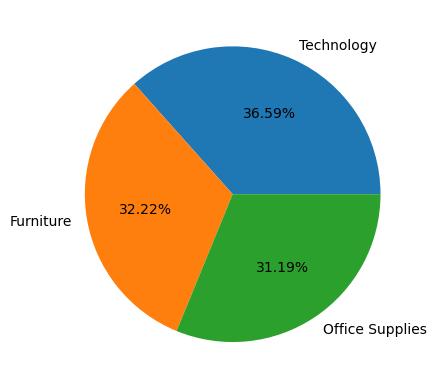

In [21]:
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.2f%%')

<BarContainer object of 17 artists>

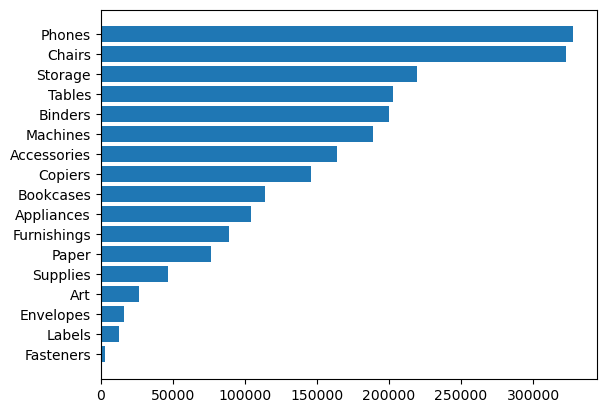

In [22]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True) 
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


<BarContainer object of 4 artists>

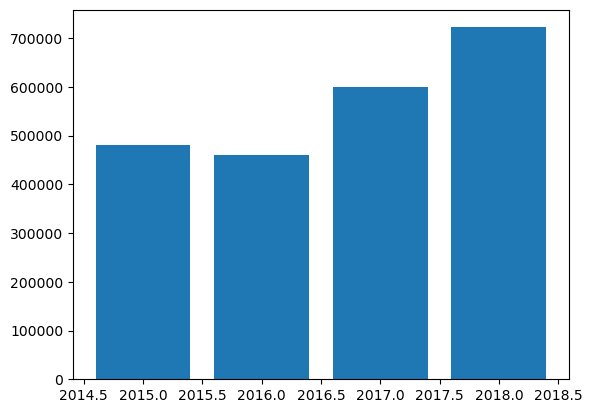

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True) 
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum() 
yearly_sales = yearly_sales.reset_index() 
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales': 'Total Sales'}) 
print(yearly_sales) 
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales']) 

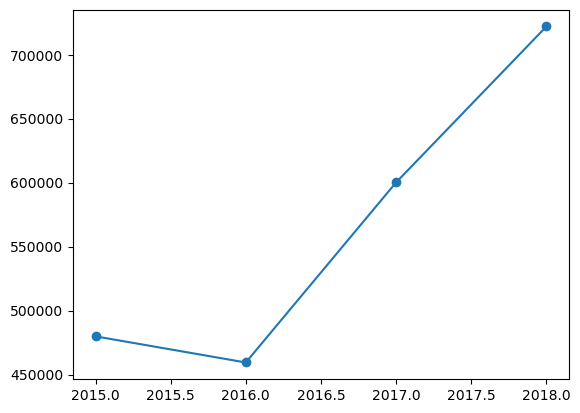

In [24]:
# this is a better graph because you get to see when things changed.
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True) 
yearly_sales = df[df['Order Date'].dt.year == 2018] 
quarterly_sales = yearly_sales.resample('Q', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index() 
quarterly_sales = quarterly_sales.rename(columns= {'Order Date': 'Quarter', 'Sales': 'Total Sales'}) 
print(quarterly_sales)

     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


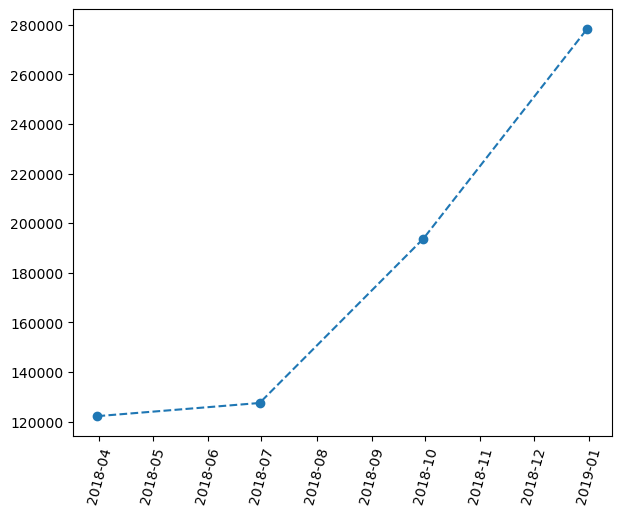

In [26]:
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--') 

plt.tight_layout() 
plt.xticks(rotation=75) 
plt.show() 

# we see something in Q3 and Q4 changed

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True) 
yearly_sales = df[df['Order Date'].dt.year==2018] 
monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum() 
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Total Monthly Sales'}) 
print(monthly_sales)

        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


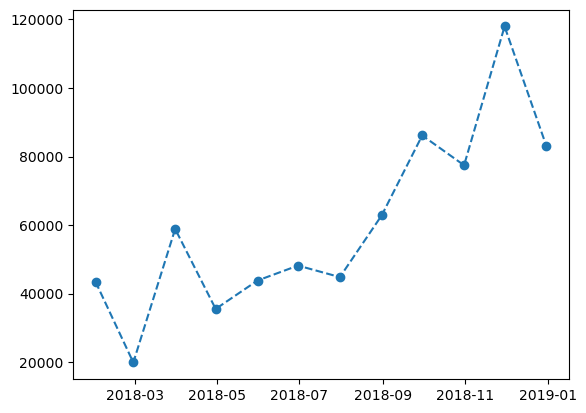

In [28]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker='o', linestyle='--') 

In [39]:
'''Companies wanting to expand to new regions face challenges of finding out 
the promising regions. You also want to stay ahead of the competition by finding out where 
the competitors are having the most success and plan accordingly.''' 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

# Initialize Plotly in Jupyter notebook mode 
import plotly.io as pio 

#Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY"

} 

# Add the Abbreviation column to the Dataframe 
df['Abbreviation'] = df['State'].map(all_state_mapping) 

# Group by State and calculate the sum of sales 
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index() 

# Add Abbreviation to sum_of_sales 
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping) 

# Create a choropleth map using Plotly 
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'], 
    locationmode='USA-states', 
    z=sum_of_sales['Sales'], 
    hoverinfo='location+z', 
    showscale=True 
)) 
fig.update_geos(projection_type="albers usa") 
fig.update_layout(
    geo_scope='usa', 
    title='Total Sales by U.S. state'
) 

fig.show()


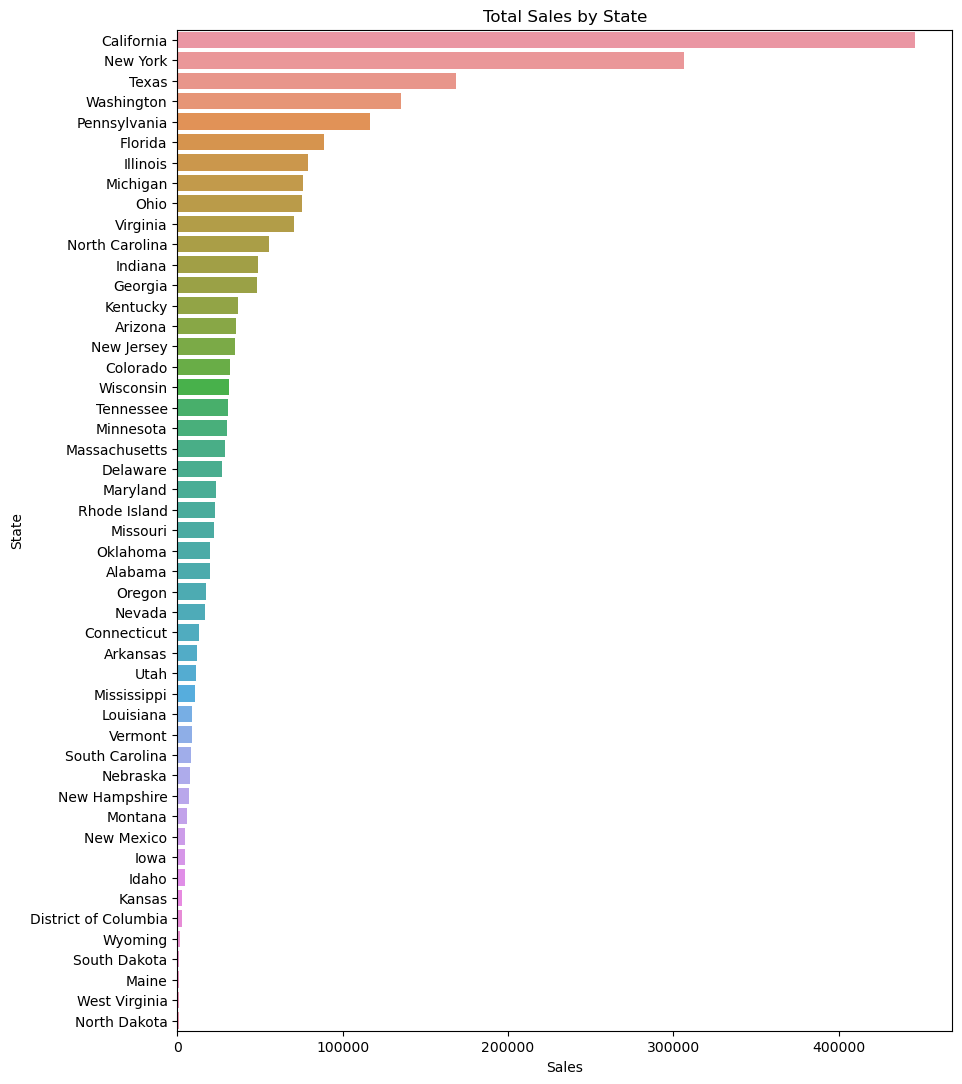

In [40]:
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index() 

sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False) 

plt.figure(figsize=(10, 13)) 
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None) 

plt.xlabel('Sales') 
plt.ylabel('State') 
plt.title('Total Sales by State') 
plt.show()

In [48]:
import plotly.express as px

# Summarise the sales data by category and sub-category.
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index() 
# Create a nested pie chart 
fig = px.sunburst(
    df_summary, path=['Category', 'Sub-Category'], values='Sales') 
fig.show()

In [49]:
# Summarise the sales data by category, ship mode and sub-category.
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index() 
# Create a treemap 
fig = px.treemap(df_summary, path=['Category', 'Ship Mode', 'Sub-Category'], values='Sales') 
fig.show()